In [2]:
import configparser
import math

import psycopg2
import pandas
from matplotlib import pyplot as plt

In [3]:
parser = configparser.ConfigParser()
parser.read('database.ini')

db_password = parser['psql']['password']

In [4]:
query = '''SELECT * 
FROM dj_hetmech_app_degreegroupedpermutation 
WHERE nonzero_sd != 'NaN' AND nonzero_sd < 1000 
ORDER BY nonzero_sd;'''

connection = psycopg2.connect(host = 'hetmech-db-dev.cobepk65dd7j.us-east-1.rds.amazonaws.com', 
                              database = 'dj_hetmech', user = 'read_only_user', password = db_password)

top_metapaths = pandas.read_sql(query, connection)

(array([3.3300e+02, 1.0090e+03, 6.8970e+03, 9.2630e+03, 9.8020e+03,
        1.0477e+04, 1.0630e+04, 1.1111e+04, 1.1994e+04, 1.0649e+04,
        1.2380e+04, 1.5945e+04, 1.4954e+04, 1.4268e+04, 1.6126e+04,
        2.0716e+04, 2.5719e+04, 1.9454e+04, 1.1283e+04, 6.8690e+03,
        5.3190e+03, 3.9940e+03, 2.9120e+03, 1.5750e+03, 8.7800e+02,
        3.2200e+02, 1.1400e+02, 5.4000e+01, 2.2000e+01, 1.4000e+01,
        1.4000e+01, 8.0000e+00, 7.0000e+00, 7.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.        , 0.05101478, 0.10202957, 0.15304435, 0.20405913,
        0.25507392, 0.3060887 , 0.35710348, 0.40811826, 0.45913305,
        0.51014783, 0.56116261, 0.6121774 , 0.66319218, 0.71420696,
        0.76522175, 0.81623653, 0.86725131, 0.91826609, 0.96928088,
        1.02029566, 1.07131044, 1.12232523, 1.

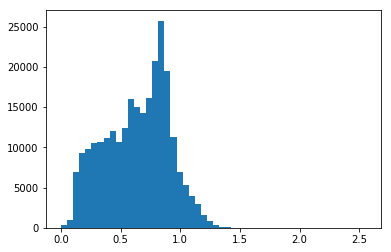

In [5]:
plt.hist(top_metapaths['nonzero_sd'], bins=50)

In [6]:
top_metapaths = top_metapaths.sort_values(by='nonzero_sd')

In [7]:
top_metapaths[300:350]

,id,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,metapath_id
300,449,10,9,2000,257,5.808508,4.460403e-07,CtD
301,99,4,18,3000,548,6.336691,4.466806e-07,CpD
302,244,2,4,99400,1021,7.018684,4.469141e-07,CtD
303,254,2,14,14200,490,6.392305,4.481852e-07,CtD
304,86,4,1,30000,327,7.781874,4.481852e-07,CpD
305,475,11,10,1800,280,5.708175,4.495664e-07,CtD
306,120,5,18,1400,326,6.225120,4.550659e-07,CpD
307,366,7,1,11200,110,7.085450,4.567272e-07,CtD
308,51,2,8,8600,342,7.088727,4.733284e-07,CpD
309,414,8,68,400,227,4.908984,4.789424e-07,CtD


In [12]:
small_sd = top_metapaths[top_metapaths['nonzero_sd'] < 1e-5]

In [13]:
small_sd

,id,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,metapath_id
0,27,1,5,108800,1347,7.670302,0.000000e+00,CpD
18,31211,59,1,400,2,6.452481,0.000000e+00,CuGdD
17,30761,26,1,800,2,6.862200,0.000000e+00,CuGdD
16,32579,34,1,200,2,5.903695,0.000000e+00,CuGuD
15,16889,173,1,200,2,4.715217,0.000000e+00,CdGdD
13,15665,12,1,1400,2,6.049335,0.000000e+00,CdGdD
12,502,12,12,200,36,5.573512,0.000000e+00,CtD
11,459,10,25,400,127,5.297699,0.000000e+00,CtD
10,7044,50,2,200,2,6.132410,0.000000e+00,CbGuD
14,518,13,3,800,62,6.226627,0.000000e+00,CtD


### Are the spurious nonzero standard deviation values affected by the number of nonzero dwpcs they are made from?

Text(0.5,1,'Nonzero dwpcs vs standard deviation')

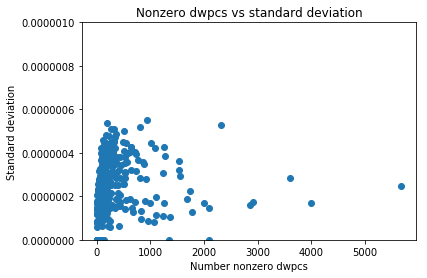

In [21]:
plt.scatter(small_sd.n_nonzero_dwpcs, small_sd.nonzero_sd)
plt.ylim(0, 1e-6)
plt.xlabel('Number nonzero dwpcs')
plt.ylabel('Standard deviation')
plt.title('Nonzero dwpcs vs standard deviation')